In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
df_user = pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/includes/Demand/user_demand_cambridge_oct7_2019_week.csv')
df_food= pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/includes/Demand/food_demand_cambridge_week.csv')

In [3]:
# Extract the day from the 'starttime' column
df_user['day'] = pd.to_datetime(df_user['starttime']).dt.day - 6

# Round down 'start_time' column to nearest 15 minutes
df_food['start_time_ed'] = pd.to_datetime(df_food['start_time']).dt.floor('15Min')
df_user['start_time_ed'] = pd.to_datetime(df_user['starttime']).dt.floor('15Min')

# Group the data by day and 15-minute intervals and count the number of rows
counts_food = df_food.groupby(['day', 'start_time_ed']).size().reset_index(name='count')
counts_user = df_user.groupby(['day', 'start_time_ed']).size().reset_index(name='count')

# Format the datetime columns
counts_food['x_datetime'] = counts_food['day'].astype(str) + ', ' + counts_food['start_time_ed'].dt.strftime('%H:%M:%S')
counts_user['x_datetime'] = counts_user['day'].astype(str) + ', ' + counts_user['start_time_ed'].dt.strftime('%H:%M:%S')

In [4]:
counts_food

,day,start_time_ed,count,x_datetime
0,1,2022-10-11 00:15:00,1,"1, 00:15:00"
1,1,2022-10-11 00:45:00,2,"1, 00:45:00"
2,1,2022-10-11 03:15:00,1,"1, 03:15:00"
3,1,2022-10-11 04:15:00,1,"1, 04:15:00"
4,1,2022-10-11 04:45:00,2,"1, 04:45:00"
...,...,...,...,...
546,7,2023-06-26 22:15:00,5,"7, 22:15:00"
547,7,2023-06-26 22:30:00,4,"7, 22:30:00"
548,7,2023-06-26 22:45:00,3,"7, 22:45:00"
549,7,2023-06-26 23:00:00,3,"7, 23:00:00"


In [5]:
# Create a DataFrame with one row every 15 minutes for 7 days
days = pd.Series(range(1, 8))
time_intervals = pd.date_range(start='00:00:00', end='23:59:59', freq='15Min')
index = pd.MultiIndex.from_product([days, time_intervals], names=['day', 'start_time_ed'])
df_counts_food = pd.DataFrame(index=index).reset_index()
df_counts_user = pd.DataFrame(index=index).reset_index()

In [6]:
# Set the index of df_counts_food
df_counts_food['x_datetime'] = df_counts_food['day'].astype(str) + ', ' + df_counts_food['start_time_ed'].dt.strftime('%H:%M:%S')


# Set the index of df_counts_user
df_counts_user['x_datetime'] = df_counts_user['day'].astype(str) + ', ' + df_counts_user['start_time_ed'].dt.strftime('%H:%M:%S')


In [7]:
df_counts_food

,day,start_time_ed,x_datetime
0,1,2023-08-07 00:00:00,"1, 00:00:00"
1,1,2023-08-07 00:15:00,"1, 00:15:00"
2,1,2023-08-07 00:30:00,"1, 00:30:00"
3,1,2023-08-07 00:45:00,"1, 00:45:00"
4,1,2023-08-07 01:00:00,"1, 01:00:00"
...,...,...,...
667,7,2023-08-07 22:45:00,"7, 22:45:00"
668,7,2023-08-07 23:00:00,"7, 23:00:00"
669,7,2023-08-07 23:15:00,"7, 23:15:00"
670,7,2023-08-07 23:30:00,"7, 23:30:00"


In [8]:

# Merge the counts with the complete DataFrame to fill missing values with zeros
df_counts_food = pd.merge(df_counts_food, counts_food[['x_datetime', 'count']], how='left', left_on=['x_datetime'], right_on=['x_datetime']).fillna({'count': 0})
df_counts_user = pd.merge(df_counts_user, counts_user[['x_datetime', 'count']], how='left', left_on=['x_datetime'], right_on=['x_datetime']).fillna({'count': 0})


In [28]:
#counts_user.to_csv("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/preprocessing/user_test.csv", index=False)
#df_counts_food.to_csv("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/preprocessing/food_test.csv", index=False)

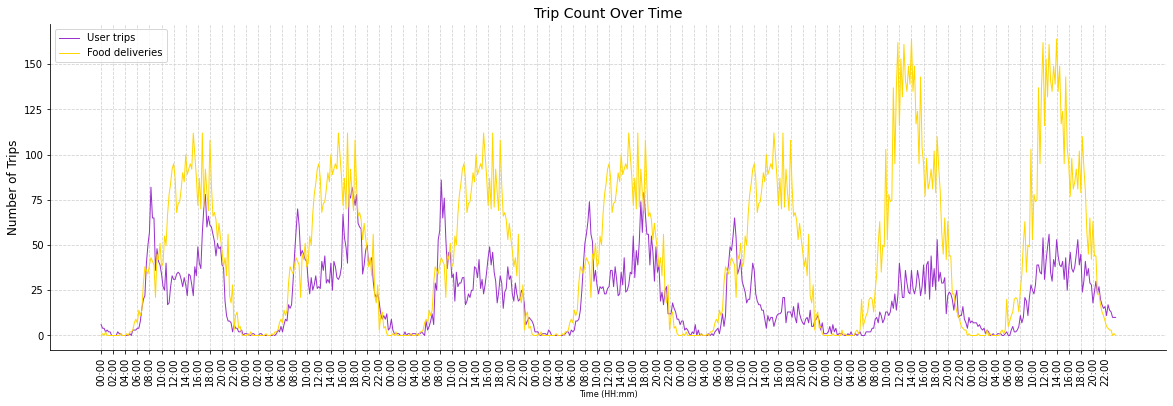

In [9]:
# Create a plot
plt.figure(figsize=(20, 6))
plt.plot(df_counts_user['x_datetime'], df_counts_user['count'], linewidth=1, color='darkorchid')
plt.plot(df_counts_food['x_datetime'], df_counts_food['count'], linewidth=1, color='gold')


# Extract the last 8 digits of x_datetime for tick labels
tick_labels = [label[-8:-3] for label in df_counts_user['x_datetime'][::8]]

# Set the x-axis tick labels and rotation
plt.xticks(df_counts_user['x_datetime'][::8], tick_labels, rotation=90)


# Set the axis labels and title
plt.xlabel('Time (HH:mm)', fontsize=8)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Trip Count Over Time', fontsize=14)

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Customize the plot background and border
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the tick parameters
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Add a legend if needed
plt.legend(['User trips','Food deliveries'], loc='best')

# Adjust the layout for better spacing
#plt.tight_layout()

# Display the plot
plt.show()

In [23]:
# Merge the two DataFrames based on the 'timestamp' column
merged_df = pd.merge(df_counts_food, df_counts_user, on='x_datetime', suffixes=('_df1', '_df2'))

# Calculate the sum of 'count' from both DataFrames
merged_df['total_count'] = merged_df['count_df1'] + merged_df['count_df2']

print(merged_df)

     day_df1   start_time_ed_df1   x_datetime  count_df1  day_df2  \
0          1 2023-08-07 00:00:00  1, 00:00:00        0.0        1   
1          1 2023-08-07 00:15:00  1, 00:15:00        1.0        1   
2          1 2023-08-07 00:30:00  1, 00:30:00        0.0        1   
3          1 2023-08-07 00:45:00  1, 00:45:00        2.0        1   
4          1 2023-08-07 01:00:00  1, 01:00:00        0.0        1   
..       ...                 ...          ...        ...      ...   
667        7 2023-08-07 22:45:00  7, 22:45:00        3.0        7   
668        7 2023-08-07 23:00:00  7, 23:00:00        3.0        7   
669        7 2023-08-07 23:15:00  7, 23:15:00        0.0        7   
670        7 2023-08-07 23:30:00  7, 23:30:00        1.0        7   
671        7 2023-08-07 23:45:00  7, 23:45:00        0.0        7   

      start_time_ed_df2  count_df2  total_count  
0   2023-08-07 00:00:00        6.0          6.0  
1   2023-08-07 00:15:00        4.0          5.0  
2   2023-08-07 00:30:

In [31]:
max_concurrent = merged_df['total_count'].max()
print(max_concurrent)



217.0


In [32]:
time_max_concurrent = merged_df.loc[merged_df['total_count']==max_concurrent]
print(time_max_concurrent)

     day_df1   start_time_ed_df1   x_datetime  count_df1  day_df2  \
627        7 2023-08-07 12:45:00  7, 12:45:00      161.0        7   
632        7 2023-08-07 14:00:00  7, 14:00:00      164.0        7   

      start_time_ed_df2  count_df2  total_count  
627 2023-08-07 12:45:00       56.0        217.0  
632 2023-08-07 14:00:00       53.0        217.0  


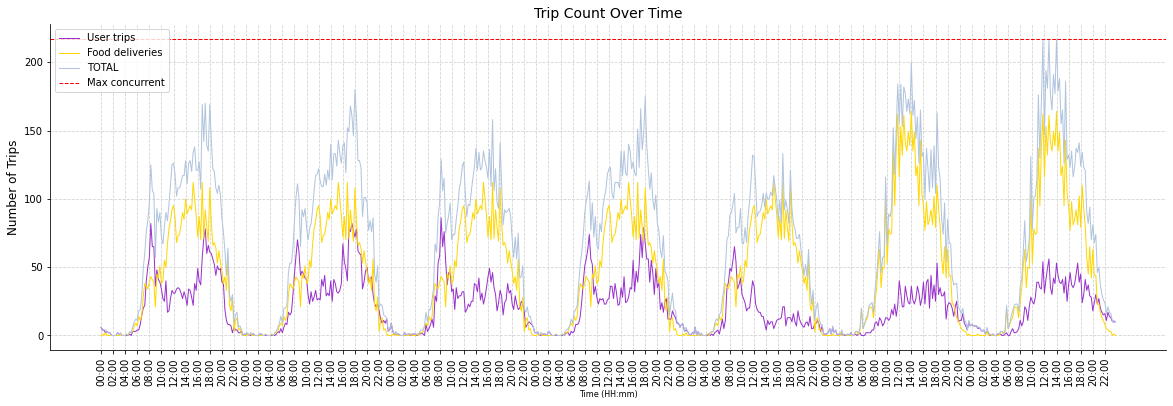

In [44]:
# Create a plot
plt.figure(figsize=(20, 6))
plt.plot(df_counts_user['x_datetime'], df_counts_user['count'], linewidth=1, color='darkorchid')
plt.plot(df_counts_food['x_datetime'], df_counts_food['count'], linewidth=1, color='gold')
#plt.plot(df_counts_food['x_datetime'], df_counts_user['count']+df_counts_food['count'], linewidth=1, color='lightsteelblue')
plt.plot(merged_df['x_datetime'], merged_df['total_count'], linewidth=1, color='lightsteelblue')
plt.axhline(y=max_concurrent, color='red', linewidth=1, linestyle='--')  # Add the horizontal red line

# Extract the last 8 digits of x_datetime for tick labels
tick_labels = [label[-8:-3] for label in df_counts_user['x_datetime'][::8]]

# Set the x-axis tick labels and rotation
plt.xticks(df_counts_user['x_datetime'][::8], tick_labels, rotation=90)


# Set the axis labels and title
plt.xlabel('Time (HH:mm)', fontsize=8)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Trip Count Over Time', fontsize=14)

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Customize the plot background and border
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the tick parameters
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Add a legend if needed
plt.legend(['User trips','Food deliveries', 'TOTAL', 'Max concurrent'], loc='best')

# Adjust the layout for better spacing
#plt.tight_layout()

# Display the plot
plt.show()

In [33]:
max_food = df_counts_food['count'].max()
print(max_food)

164.0


In [46]:
time_max_concurrent_food = df_counts_food.loc[df_counts_food['count']==max_food]
print(time_max_concurrent_food)

     day       start_time_ed   x_datetime  count
536    6 2023-08-07 14:00:00  6, 14:00:00  164.0
632    7 2023-08-07 14:00:00  7, 14:00:00  164.0


In [34]:
max_user= df_counts_user['count'].max()
print(max_user)

86.0


In [47]:
time_max_concurrent_user= df_counts_user.loc[df_counts_user['count']==max_user]
print(time_max_concurrent_user)

     day       start_time_ed   x_datetime  count
225    3 2023-08-07 08:15:00  3, 08:15:00   86.0


In [35]:
max_sum= max_user + max_food
print(max_sum)

250.0


In [40]:
#Theoretical max saving
pct_improve = (max_concurrent-max_sum)/max_sum *100
print("{:.2f}".format(pct_improve))

-13.20


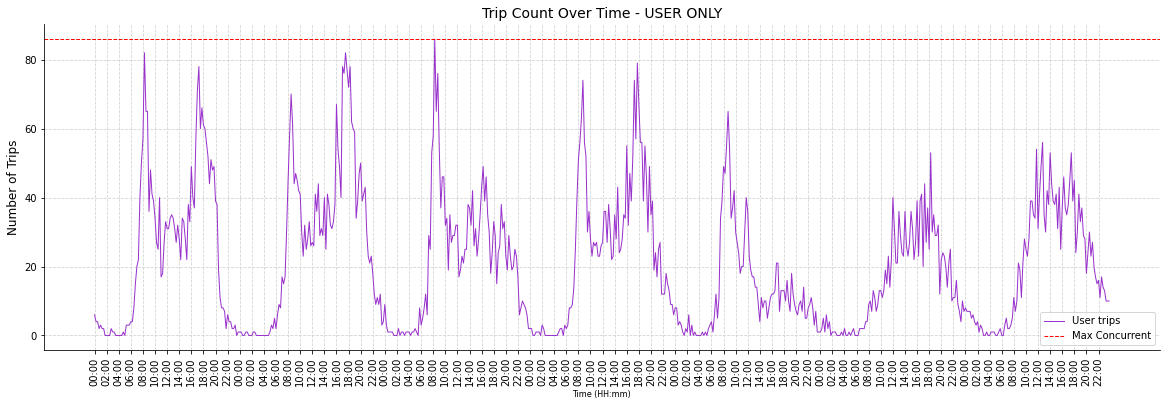

In [43]:
# Create a plot
plt.figure(figsize=(20, 6))
plt.plot(df_counts_user['x_datetime'], df_counts_user['count'], linewidth=1, color='darkorchid')
#plt.plot(df_counts_food['x_datetime'], df_counts_food['count'], linewidth=1, color='gold')
plt.axhline(y=max_user, color='red', linewidth=1, linestyle='--')  # Add the horizontal red line

# Extract the last 8 digits of x_datetime for tick labels
tick_labels = [label[-8:-3] for label in df_counts_user['x_datetime'][::8]]

# Set the x-axis tick labels and rotation
plt.xticks(df_counts_user['x_datetime'][::8], tick_labels, rotation=90)


# Set the axis labels and title
plt.xlabel('Time (HH:mm)', fontsize=8)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Trip Count Over Time - USER ONLY', fontsize=14)

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Customize the plot background and border
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the tick parameters
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Add a legend if needed
plt.legend(['User trips','Max Concurrent'], loc='best')

# Adjust the layout for better spacing
#plt.tight_layout()

# Display the plot
plt.show()

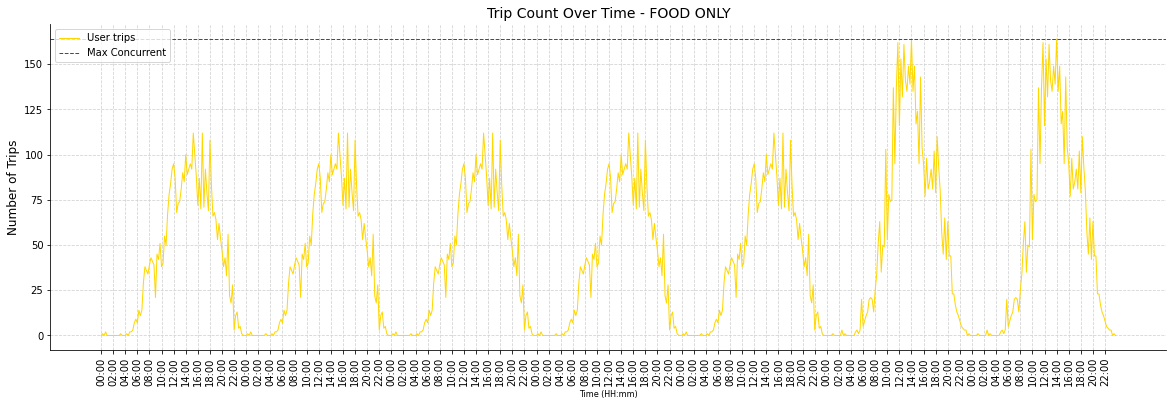

In [45]:
# Create a plot
plt.figure(figsize=(20, 6))
#plt.plot(df_counts_user['x_datetime'], df_counts_user['count'], linewidth=1, color='darkorchid')
plt.plot(df_counts_food['x_datetime'], df_counts_food['count'], linewidth=1, color='gold')
plt.axhline(y=max_food, color='red', linewidth=1, linestyle='--')  # Add the horizontal red line

# Extract the last 8 digits of x_datetime for tick labels
tick_labels = [label[-8:-3] for label in df_counts_user['x_datetime'][::8]]

# Set the x-axis tick labels and rotation
plt.xticks(df_counts_user['x_datetime'][::8], tick_labels, rotation=90)


# Set the axis labels and title
plt.xlabel('Time (HH:mm)', fontsize=8)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Trip Count Over Time - FOOD ONLY', fontsize=14)

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Customize the plot background and border
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the tick parameters
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Add a legend if needed
plt.legend(['User trips','Max Concurrent'], loc='best')

# Adjust the layout for better spacing
#plt.tight_layout()

# Display the plot
plt.show()

In [11]:
# Extract the day from the 'starttime' column
#df_user['day'] = pd.to_datetime(df_user['starttime']).dt.day
#df_user['day'] = df_user['day'] - 6

#df_food['start_time'] = pd.to_datetime(df_food['start_time'])
##df_user['start_time_ed'] = pd.to_datetime(df_user['starttime'])

# Remove fractional seconds from 'start_time_ed' column
##df_user['start_time_ed'] = df_user['start_time_ed'].dt.floor('s')

# Group the data by day and 15-minute intervals and count the number of rows
#counts_food = df_food.groupby(['day', pd.Grouper(key='start_time', freq='15Min')]).size().reset_index(name='count')
#counts_user = df_user.groupby(['day', pd.Grouper(key='start_time_ed', freq='15Min')]).size().reset_index(name='count')


#counts_food['x_time'] = counts_food['start_time'].dt.strftime('%H:%M:%S')
#counts_user['x_time'] = counts_user['start_time_ed'].dt.strftime('%H:%M:%S')


# Combine day and x_time columns into a single datetime column
#counts_user['x_datetime'] = counts_user['day'].astype(str) + ', ' + counts_user['x_time']
#counts_food['x_datetime'] = counts_food['day'].astype(str) + ', ' + counts_food['x_time']


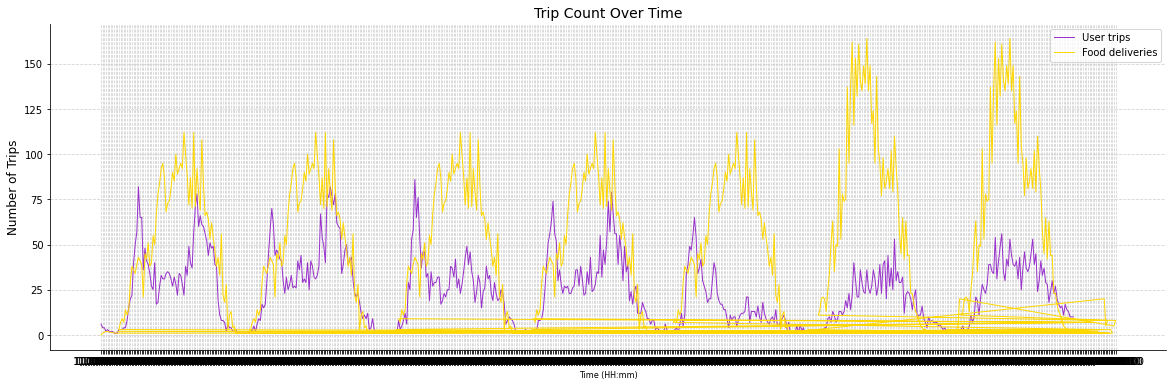

In [12]:
# Extract the day from the 'starttime' column
df_user['day'] = pd.to_datetime(df_user['starttime']).dt.day
df_user['day'] = df_user['day'] - 6

df_food['start_time'] = pd.to_datetime(df_food['start_time'])
df_user['start_time_ed'] = pd.to_datetime(df_user['starttime'])

# Remove fractional seconds from 'start_time_ed' column
df_user['start_time_ed'] = df_user['start_time_ed'].dt.floor('s')

# Group the data by day and 15-minute intervals and count the number of rows
counts_food = df_food.groupby(['day', pd.Grouper(key='start_time', freq='15Min')]).size().reset_index(name='count')
counts_user = df_user.groupby(['day', pd.Grouper(key='start_time_ed', freq='15Min')]).size().reset_index(name='count')


counts_food['x_time'] = counts_food['start_time'].dt.strftime('%H:%M:%S')
counts_user['x_time'] = counts_user['start_time_ed'].dt.strftime('%H:%M:%S')


# Combine day and x_time columns into a single datetime column
counts_user['x_datetime'] = counts_user['day'].astype(str) + ', ' + counts_user['x_time']
counts_food['x_datetime'] = counts_food['day'].astype(str) + ', ' + counts_food['x_time']

# Add a new row with 0 count at 0:00
new_row = pd.DataFrame({'x_datetime': ['1, 00:00:00'], 'count': [0]})
counts_food = pd.concat([new_row, counts_food], ignore_index=True)

# Remove duplicates and inconsistencies from counts_food DataFrame
#counts_food = counts_food.drop_duplicates(subset=['x_datetime'])
#counts_food = counts_food.sort_values('x_datetime')

# Create a plot
plt.figure(figsize=(20, 6))
plt.plot(counts_user['x_datetime'], counts_user['count'], linewidth=1, color='darkorchid')
plt.plot(counts_food['x_datetime'], counts_food['count'], linewidth=1, color='gold')

# Set the axis labels and title
plt.xlabel('Time (HH:mm)', fontsize=8)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Trip Count Over Time', fontsize=14)

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Customize the plot background and border
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the tick parameters
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

# Add a legend if needed
plt.legend(['User trips','Food deliveries'], loc='best')

# Adjust the layout for better spacing
#plt.tight_layout()

# Display the plot
plt.show()